In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

In [ ]:
csv_file_path = 'coffee.csv'
df = pd.read_csv(csv_file_path)
df.head()


,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83,Unknown


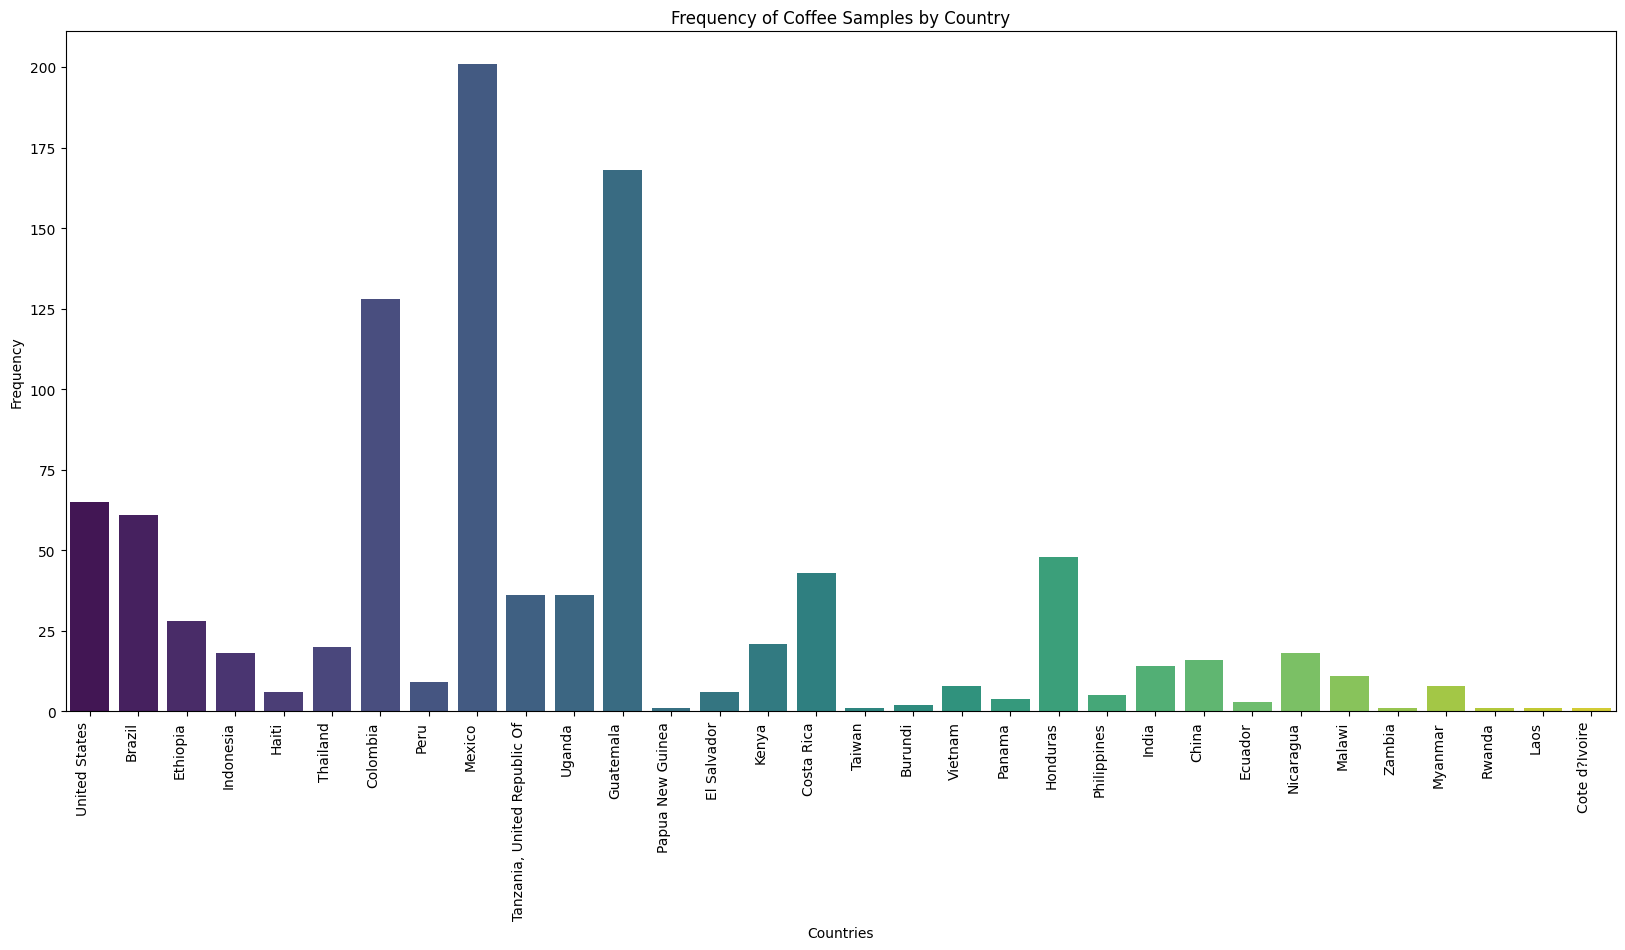

Mexico                          201
Guatemala                       168
Colombia                        128
United States                    65
Brazil                           61
Honduras                         48
Costa Rica                       43
Uganda                           36
Tanzania, United Republic Of     36
Ethiopia                         28
Kenya                            21
Thailand                         20
Nicaragua                        18
Indonesia                        18
China                            16
India                            14
Malawi                           11
Peru                              9
Myanmar                           8
Vietnam                           8
El Salvador                       6
Haiti                             6
Philippines                       5
Panama                            4
Ecuador                           3
Burundi                           2
Laos                              1
Rwanda                      

In [ ]:
country_freq = df['Location.Country'].value_counts()

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Location.Country', data=df, palette='viridis')

# Adjust the position of x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.subplots_adjust(bottom=0.2)

plt.title('Frequency of Coffee Samples by Country')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.show()
print(country_freq)

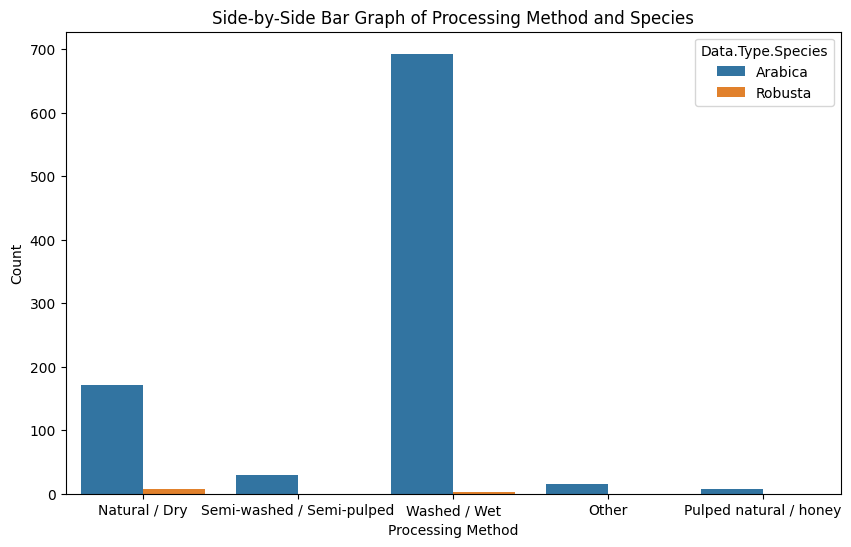

Data.Type.Species            Arabica  Robusta  Total
Data.Type.Processing method                         
Natural / Dry                    172        7    179
Other                             16        0     16
Pulped natural / honey             7        0      7
Semi-washed / Semi-pulped         29        0     29
Washed / Wet                     693        3    696
Total                            917       10    927


In [ ]:
two_way_table = pd.crosstab(index=df['Data.Type.Processing method'], columns=df['Data.Type.Species'], margins=True, margins_name='Total')
plt.figure(figsize=(10, 6))
sns.countplot(x='Data.Type.Processing method', hue='Data.Type.Species', data=df)
plt.title('Side-by-Side Bar Graph of Processing Method and Species')
plt.xlabel('Processing Method')
plt.ylabel('Count')
plt.show()
print(two_way_table)

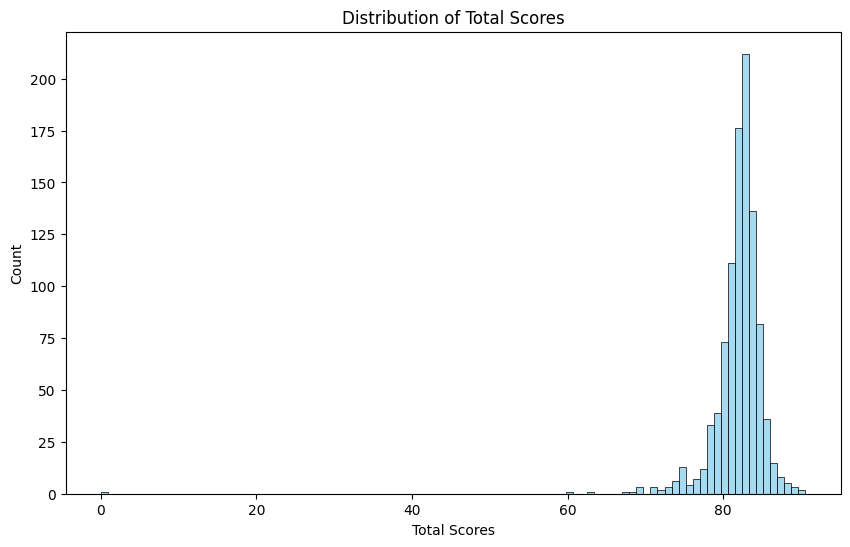

Aggregate Data for Data.Scores.Total:
count    989.000000
mean      81.972133
std        3.859562
min        0.000000
25%       81.080000
50%       82.500000
75%       83.580000
max       90.580000
Name: Data.Scores.Total, dtype: float64
Outliers:
    Location.Country                Location.Region  Location.Altitude.Min  \
9              Haiti                      marmelade                    640   
35         Indonesia                      indonesia                   3500   
36              Peru                            NaN                      0   
332           Mexico            motozintla, chiapas                   1200   
333           Mexico                       coatepec                   1100   
..               ...                            ...                    ...   
724    United States  kwanza norte province, angola                    795   
921            India                 chickmangalore                      0   
922           Brazil         campos altos - cerrad

In [ ]:

total_scores_stats = df['Data.Scores.Total'].describe()

Q1 = total_scores_stats['25%']
Q3 = total_scores_stats['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Data.Scores.Total'] < lower_bound) | (df['Data.Scores.Total'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(df['Data.Scores.Total'], bins=100, color='skyblue')
plt.title('Distribution of Total Scores')
plt.xlabel('Total Scores')
plt.show()

print('Aggregate Data for Data.Scores.Total:')
print(total_scores_stats)

print('Outliers:')
print(outliers)


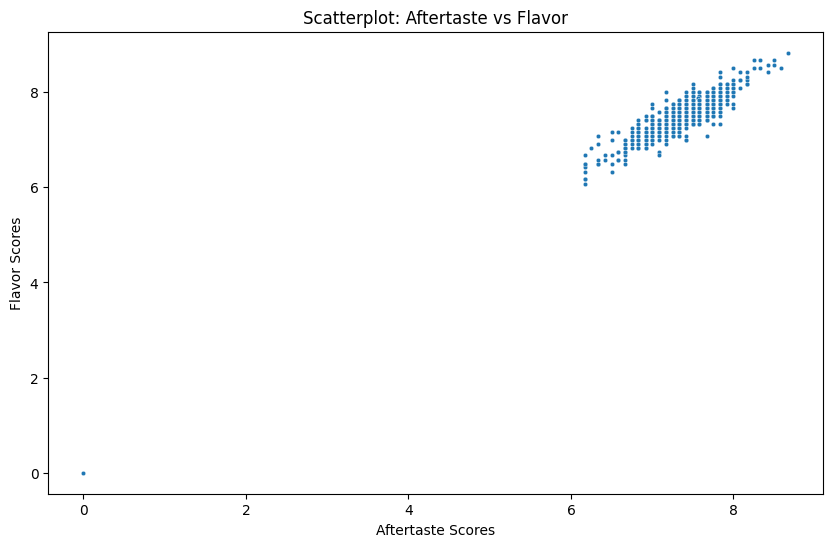

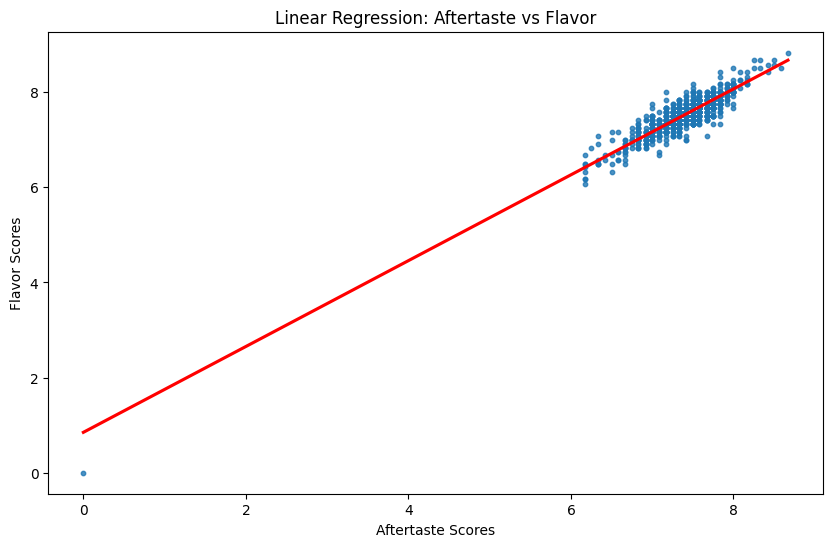

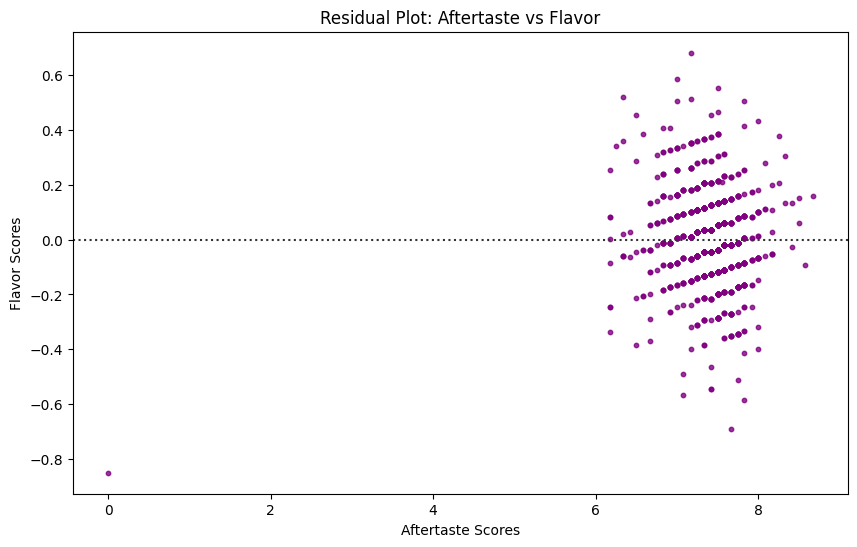

R Value: 0.9122221693075354
R Squared Value: 0.8321492861761458
s Value: 0.17234955988260223
Slope: 0.9023409145841362
Y-Intercept: 0.8493910884289564
Outliers based on Residuals:
                 Location.Country             Location.Region  \
9                           Haiti                   marmelade   
44               Papua New Guinea  eastern highlands province   
98                      Guatemala                     oriente   
163                      Thailand                    thailand   
204                        Mexico       san bartolo tutotepec   
205                     Guatemala                     oriente   
211                       Vietnam                   don duong   
269                         Haiti                       haiti   
284                      Thailand                    thailand   
323                     Guatemala                     oriente   
382                   El Salvador                     apaneca   
506                     Guatemala       

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data.Scores.Aftertaste', y='Data.Scores.Flavor', data=df, s=10)
plt.title('Scatterplot: Aftertaste vs Flavor')
plt.xlabel('Aftertaste Scores')
plt.ylabel('Flavor Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Data.Scores.Aftertaste', y='Data.Scores.Flavor', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'}, ci=None)
plt.title('Linear Regression: Aftertaste vs Flavor')
plt.xlabel('Aftertaste Scores')
plt.ylabel('Flavor Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x='Data.Scores.Aftertaste', y='Data.Scores.Flavor', data=df, scatter_kws={'s': 10}, color='purple')
plt.title('Residual Plot: Aftertaste vs Flavor')
plt.xlabel('Aftertaste Scores')
plt.ylabel('Flavor Scores')
plt.show()

X = df[['Data.Scores.Aftertaste']]
y = df['Data.Scores.Flavor']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

r_squared = r2_score(y, y_pred)
s = residuals.std()
slope = model.coef_[0]
intercept = model.intercept_

print('R Value:',math.sqrt(r_squared)) #since the regression is positive, the r value must be positive so I didn't consider the r sqaured value
print('R Squared Value:', r_squared)
print('s Value:', s)
print('Slope:', slope)
print('Y-Intercept:', intercept)

residual_stats = pd.Series(residuals).describe()
residual_Q1 = residual_stats['25%']
residual_Q3 = residual_stats['75%']
residual_IQR = residual_Q3 - residual_Q1
residual_lower_bound = residual_Q1 - 1.5 * residual_IQR
residual_upper_bound = residual_Q3 + 1.5 * residual_IQR

outliers_residual = df[(residuals < residual_lower_bound) | (residuals > residual_upper_bound)]

print('Outliers based on Residuals:')
print(outliers_residual)